# MULTIPLICACIÓN DE MATRICES EN PARALELO Y SECUENCIAL

## Especificaciones de maquina
Encontradas en los archivos pc_info.txt y gpu_info.txt dentro del repositorio

## Shell Script 
prueba.hpc y prueba2.hpc son shell scripts que realizan de forma automatica la compilacion, ejecucion y recoleccion de datos, el primer archivo es para el proceso de secuencial  y el segundo para el proceso de paralelo

## Tiempos de ejecución en secuencial

datos_paralelo.txt y datos_sec.txt guardan los tiempos de ejecucion, con 30 tiempos de ejecución por cada tamaño de matriz, siendo estos 100,250,500,750 y 1000

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import load_dataset

In [4]:
datos = pd.read_csv("datos_sec.txt")
datos.head()

,TAM_S,TIME_S
0,100,0.011374
1,250,0.162874
2,500,1.588370
3,750,6.227720
4,1000,20.103900


Sacamos el promedio de los datos de la tabla secuencial 

In [5]:
datSeq = datos.groupby(["TAM_S"]).mean()
datSeq.reset_index(level=0,inplace=True)
datSeq

,TAM_S,TIME_S
0,100,0.011955
1,250,0.165485
2,500,1.590111
3,750,6.461071
4,1000,20.438326


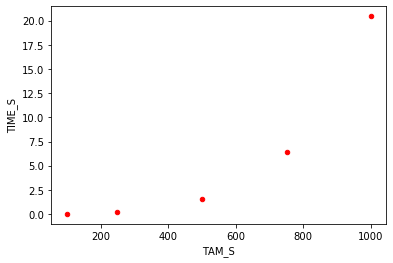

In [6]:
datSeq.plot(kind='scatter',x='TAM_S',y='TIME_S',color='red')
plt.show()

## Tiempos de ejecucion en paralelo

In [7]:
datos_p = pd.read_csv("datos_paralelo.txt")
datos_p.head()

,TAM_P,TIME_P
0,100,0.009151
1,250,0.090948
2,500,1.016210
3,750,4.629140
4,1000,16.301400


In [8]:
datParl = datos_p.groupby(["TAM_P"]).mean()
datParl.reset_index(level=0,inplace=True)
datParl

,TAM_P,TIME_P
0,100,0.006601
1,250,0.102164
2,500,1.247381
3,750,5.062511
4,1000,15.967606


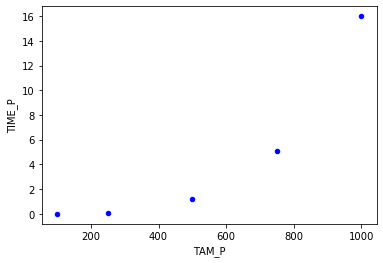

In [9]:
datParl.plot(kind='scatter',x='TAM_P',y='TIME_P',color='blue')
plt.show()

## Merge entre secuencial y paralelo 

In [10]:
datosMerge = pd.merge(left = datSeq, left_index = False, left_on='TAM_S', 
                       right=datParl, right_index=False,right_on = 'TAM_P')
datosMerge

,TAM_S,TIME_S,TAM_P,TIME_P
0,100,0.011955,100,0.006601
1,250,0.165485,250,0.102164
2,500,1.590111,500,1.247381
3,750,6.461071,750,5.062511
4,1000,20.438326,1000,15.967606


### $$Speedup = \frac{secuencial}{paralelo}$$

In [11]:
dat_t = datosMerge["TIME_S"]/ datosMerge["TIME_P"]
dat_t

0    1.811104
1    1.619805
2    1.274760
3    1.276258
4    1.279987
dtype: float64

## Speedup entre secuencial y paralelo

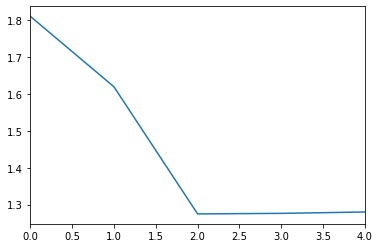

In [21]:
ax = plt.gca()
dat_t.plot(kind='line',x='TAM_S',y='dat_t', ax=ax)
plt.show()

## Tiempos de ejecución en procesos (fork)

In [13]:
datos = pd.read_csv("datos_fork.txt")
datos.head()

,TAM_F,TIME_F
0,100,0.035183
1,250,0.362052
2,500,2.574240
3,750,8.895790
4,1000,24.156400


In [14]:
datfork = datos.groupby(["TAM_F"]).mean()
datfork.reset_index(level=0,inplace=True)
datfork

,TAM_F,TIME_F
0,100,0.021464
1,250,0.359584
2,500,2.611877
3,750,9.047678
4,1000,24.417552


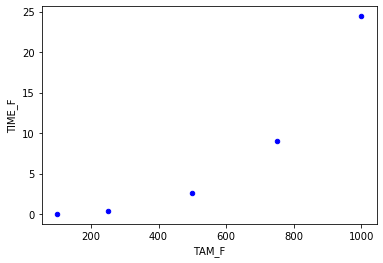

In [15]:
datfork.plot(kind='scatter',x='TAM_F',y='TIME_F',color='blue')
plt.show()

## Speedup Secuencial vs Procesos

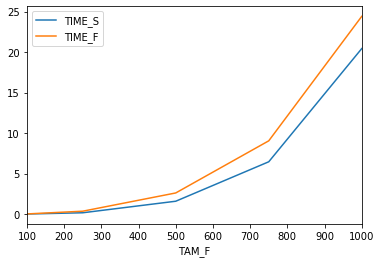

In [16]:
ax = plt.gca()
datSeq.plot(kind='line',x='TAM_S',y='TIME_S', ax=ax)
datfork.plot(kind='line',x='TAM_F',y='TIME_F', ax=ax)
plt.show()

In [17]:
datosMerge1 = pd.merge(left = datSeq, left_index = False, left_on='TAM_S', 
                       right=datfork, right_index=False,right_on = 'TAM_F')
datosMerge1

,TAM_S,TIME_S,TAM_F,TIME_F
0,100,0.011955,100,0.021464
1,250,0.165485,250,0.359584
2,500,1.590111,500,2.611877
3,750,6.461071,750,9.047678
4,1000,20.438326,1000,24.417552


In [18]:
dat_t1 = datosMerge1["TIME_S"]/ datosMerge1["TIME_F"]
dat_t1

0    0.556966
1    0.460212
2    0.608800
3    0.714114
4    0.837034
dtype: float64

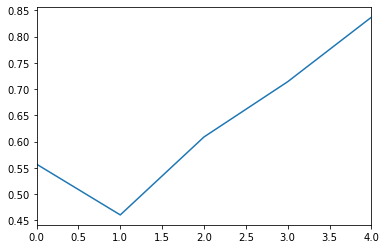

In [22]:
ax = plt.gca()
dat_t1.plot(kind='line',x='TAM_F',y='dat_t1', ax=ax)
plt.show()

## Speedup Paralelo vs Procesos

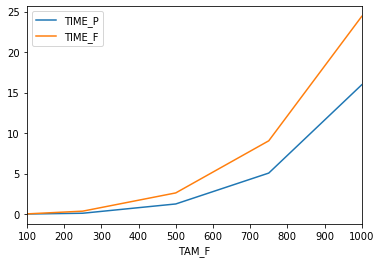

In [19]:
ax = plt.gca()
datParl.plot(kind='line',x='TAM_P',y='TIME_P', ax=ax)
datfork.plot(kind='line',x='TAM_F',y='TIME_F', ax=ax)
plt.show()

In [23]:
datosMerge2 = pd.merge(left = datParl, left_index = False, left_on='TAM_P', 
                       right=datfork, right_index=False,right_on = 'TAM_F')
datosMerge2

,TAM_P,TIME_P,TAM_F,TIME_F
0,100,0.006601,100,0.021464
1,250,0.102164,250,0.359584
2,500,1.247381,500,2.611877
3,750,5.062511,750,9.047678
4,1000,15.967606,1000,24.417552


In [24]:
dat_t2 = datosMerge2["TIME_P"]/ datosMerge2["TIME_F"]
dat_t2

0    0.307528
1    0.284116
2    0.477580
3    0.559537
4    0.653940
dtype: float64

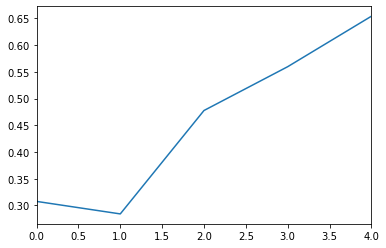

In [25]:
ax = plt.gca()
dat_t2.plot(kind='line',x='TAM_F',y='dat_t2', ax=ax)
plt.show()